 ## Set up

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.core.indexes import multi

import config
from config import LEVELS, sm, with_sm, no_sm, with_unique_sm, GRAPHS_PATH, genes, proteins, proteoforms
from interactomes import get_interactome, print_interactome_details, get_json_filename, read_graph, get_sizes
from lib.graph_database import get_participants, get_components
from networks import get_multiindex

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

config.set_root_wd()

Working directory: c:\git\pathwayanalysisplatform\proteoformnetworks


In [2]:
# Genes:
# Pathway, Reaction, Entity, Name, Type, Id, Database, Role

# Proteins:
# Pathway, Reaction, Entity, Name, Type, Id, PrevId, Database, Role

# Proteoforms:
# Pathway, Reaction, Entity, Name, Type, Id, PrevId, Database, Role

# Small molecules:
# Pathway, Reaction, Entity, Name, Type, Id, Database, Role

participant_records = { l: get_participants(l, GRAPHS_PATH) for l in LEVELS}
participant_records[sm] = get_participants(sm, GRAPHS_PATH)

for level in [*LEVELS, sm]:
    participant_records

In [3]:
# Genes:
# Complex, Entity, Name, Type, Id

# Proteins:
# Complex, Entity, Name, Type, Id, PrevId

# Proteoforms:
# Complex, Entity, Name, Type, Id, PrevId

# Small molecules:
# Complex, Entity, Name, Type, Id

components_records = { l: get_components(l, GRAPHS_PATH) for l in LEVELS}
components_records[sm] = get_components(sm, GRAPHS_PATH)

components_records

{'genes':         Unnamed: 0        Complex         Entity          Name  \
 0                0  R-HSA-1006173   R-HSA-976788           CFH   
 1                1  R-HSA-1008206  R-HSA-1008221          NFE2   
 2                2  R-HSA-1008206  R-HSA-1008261          MAFF   
 3                3  R-HSA-1008206  R-HSA-1008212          MAFG   
 4                4  R-HSA-1008206  R-HSA-1008242          MAFK   
 ...            ...            ...            ...           ...   
 108399      108399   R-NUL-997399   R-HSA-879433         S100B   
 108400      108400   R-NUL-997399   R-HSA-976740  APP(672-711)   
 108401      108401   R-NUL-997399   R-HSA-879382         HMGB1   
 108402      108402   R-NUL-997399  R-HSA-2457833  SAA1(19-122)   
 108403      108403   R-NUL-997399   R-HSA-197639          AGER   
 
                                  Type     Id  
 0       EntityWithAccessionedSequence    CFH  
 1       EntityWithAccessionedSequence   NFE2  
 2       EntityWithAccessionedSequence   

In [4]:
interactomes_no_sm = { l: get_interactome(l, no_sm, participant_records, components_records, GRAPHS_PATH) for l in LEVELS}
for level, interactome in interactomes_no_sm.items():
     print_interactome_details(interactome)

Graph for genes 
Graph edges: 453137
Graph nodes: 10968
Graph genes nodes: 10968
Graph small molecule nodes: 0

***********************


Graph for proteins 
Graph edges: 462430
Graph nodes: 11066
Graph proteins nodes: 11066
Graph small molecule nodes: 0

***********************


Graph for proteoforms 
Graph edges: 677057
Graph nodes: 14295
Graph proteoforms nodes: 14295
Graph small molecule nodes: 0

***********************




In [5]:
interactomes_with_sm = { l: get_interactome(l, with_sm, participant_records, components_records, GRAPHS_PATH) for l in LEVELS}
for level, interactome in interactomes_with_sm.items():
     print_interactome_details(interactome)

Graph for genes 
Graph edges: 528969
Graph nodes: 12933
Graph genes nodes: 10968
Graph small molecule nodes: 1965

***********************


Graph for proteins 
Graph edges: 538874
Graph nodes: 13031
Graph proteins nodes: 11066
Graph small molecule nodes: 1965

***********************


Graph for proteoforms 
Graph edges: 759198
Graph nodes: 16260
Graph proteoforms nodes: 14295
Graph small molecule nodes: 1965

***********************




In [6]:
interactomes_with_unique_sm = { l: get_interactome(l, with_unique_sm, participant_records, components_records, GRAPHS_PATH) for l in LEVELS}

for level, interactome in interactomes_with_unique_sm.items():
     print_interactome_details(interactome)


Graph for genes 
Graph edges: 839401
Graph nodes: 39078
Graph genes nodes: 10968
Graph small molecule nodes: 28110

***********************


Graph for proteins 
Graph edges: 853568
Graph nodes: 39176
Graph proteins nodes: 11066
Graph small molecule nodes: 28110

***********************


Graph for proteoforms 
Graph edges: 1077886
Graph nodes: 42405
Graph proteoforms nodes: 14295
Graph small molecule nodes: 28110

***********************




In [7]:
index = get_multiindex()
index

MultiIndex([(            'Not Included',       'genes'),
            (            'Not Included',    'proteins'),
            (            'Not Included', 'proteoforms'),
            (                'Included',       'genes'),
            (                'Included',    'proteins'),
            (                'Included', 'proteoforms'),
            ('Reaction-Unique Included',       'genes'),
            ('Reaction-Unique Included',    'proteins'),
            ('Reaction-Unique Included', 'proteoforms')],
           names=['Small Molecules', 'Entity Level'])

In [8]:
nums_no_sm = get_sizes(interactomes_no_sm)
nums_with_sm = get_sizes(interactomes_with_sm)
nums_with_unique_sm = get_sizes(interactomes_with_unique_sm)

In [9]:
df_sizes = pd.DataFrame({
    "Interactions": [*nums_no_sm[0], *nums_with_sm[0], *nums_with_unique_sm[0]],
    "Accessioned Entities": [*nums_no_sm[1], *nums_with_sm[1], *nums_with_unique_sm[1]],
    "Small Molecules": [*nums_no_sm[2], *nums_with_sm[2], *nums_with_unique_sm[2]]
}, index=index)
df_sizes.columns.name = "Sizes"
df_sizes

Sizes                                  Interactions  Accessioned Entities  \
Small Molecules          Entity Level                                       
Not Included             genes               453137                 10968   
                         proteins            462430                 11066   
                         proteoforms         677057                 14295   
Included                 genes               528969                 10968   
                         proteins            538874                 11066   
                         proteoforms         759198                 14295   
Reaction-Unique Included genes               839401                 10968   
                         proteins            853568                 11066   
                         proteoforms        1077886                 14295   

Sizes                                  Small Molecules  
Small Molecules          Entity Level                   
Not Included             genes                       0  
                         proteins                    0  
                         proteoforms                 0  
Included                 genes                    1965  
                         proteins                 1965  
                         proteoforms              1965  
Reaction-Unique Included genes                   28110  
                         proteins                28110  
                         proteoforms             28110

In [10]:
# Create a list with the number of genes, proteins, proteoforms, small molecules
num_nodes = [*df_sizes.loc[['Not Included']]["Accessioned Entities"], df_sizes.loc[['Included']]["Small Molecules"][0]]

# Create list with all levels:
node_types = [*LEVELS, "small molecules"]

# Create a list with the number of interactions without the small molecules
num_interactions_no_sm = df_sizes.loc[['Not Included']]["Interactions"]

num_interactions_with_sm = df_sizes.loc[['Included']]["Interactions"]

maxy = max([*num_interactions_with_sm, *num_interactions_no_sm])

maxy = 800000

<ipython-input-11-aa9fbb78aa11>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot2.set_xticklabels(LEVELS, rotation=45)
<ipython-input-11-aa9fbb78aa11>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot3.set_xticklabels(LEVELS, rotation=45)


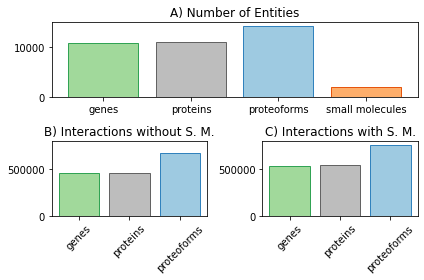

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from config import COLORS_BORDER

figure, axis = plt.subplots(2, 2)
# Placing the plots in the plane
plot1 = plt.subplot2grid((2, 2), (0, 0), rowspan=1, colspan=2)
plot2 = plt.subplot2grid((2, 2), (1, 0), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((2, 2), (1, 1), rowspan=1, colspan=1)

# Plot number of nodes
plot1.bar(node_types, num_nodes, color=config.COLORS_FILL, edgecolor=COLORS_BORDER)
plot1.set_title('A) Number of Entities')

plt.xticks(rotation=90)

# Plot number of interactions without small molecules
plot2.bar(LEVELS, num_interactions_no_sm, color=config.COLORS_FILL, edgecolor=COLORS_BORDER)
plot2.set_title('B) Interactions without S. M.')
plot2.set_ylim([0, maxy])
plot2.set_xticklabels(LEVELS, rotation=45)

# Plot number of interactions with small molecules
plot3.bar(LEVELS, num_interactions_with_sm, color=config.COLORS_FILL, edgecolor=COLORS_BORDER)
plot3.set_title('C) Interactions with S. M.')
plot3.set_ylim([0, maxy])
plot3.set_xticklabels(LEVELS, rotation=45)

# Packing all the plots and displaying them
plt.tight_layout()
plt.show()

figure.savefig('figures/figure_4.png')
plt.close()

In [12]:
interactomes = [*interactomes_no_sm.values(), *interactomes_with_sm.values(), *interactomes_with_unique_sm.values()]
degree_sequences = pd.Series([sorted([d for n, d in interactome.degree()], reverse=True) for interactome in interactomes], index=index)
degree_sequences

Small Molecules           Entity Level
Not Included              genes           [1241, 1218, 1057, 1057, 902, 892, 586, 578, 5...
                          proteins        [1242, 1219, 1058, 1058, 904, 894, 594, 578, 5...
                          proteoforms     [1469, 1444, 1279, 1279, 915, 898, 627, 619, 6...
Included                  genes           [3431, 3270, 2678, 2093, 2089, 2084, 1372, 129...
                          proteins        [3452, 3292, 2767, 2181, 2169, 2104, 1379, 129...
                          proteoforms     [4085, 3963, 3061, 2412, 2299, 2221, 1520, 149...
Reaction-Unique Included  genes           [1920, 1890, 1809, 1769, 1559, 1559, 1498, 148...
                          proteins        [1922, 1892, 1810, 1770, 1560, 1560, 1500, 148...
                          proteoforms     [2029, 1987, 1933, 1896, 1773, 1773, 1494, 148...
dtype: object

In [13]:
mins = pd.Series([min(degree_sequence) for degree_sequence in degree_sequences], index=index)
maxs = pd.Series([max(degree_sequence) for degree_sequence in degree_sequences], index=index)
avgs = pd.Series([sum(degree_sequence)/len(degree_sequence) for degree_sequence in degree_sequences], index=index)

df_degrees = pd.DataFrame({"Min": mins, "Max": maxs, "Avg": avgs}, index=index)
df_degrees


Min   Max   Avg
Small Molecules          Entity Level                 
Not Included             genes           0  1241 82.63
                         proteins        0  1242 83.58
                         proteoforms     0  1469 94.73
Included                 genes           0  3431 81.80
                         proteins        0  3452 82.71
                         proteoforms     0  4085 93.38
Reaction-Unique Included genes           0  1920 42.96
                         proteins        0  1922 43.58
                         proteoforms     0  2029 50.84

In [49]:
df_seq = pd.DataFrame({"Sequence": degree_sequences})
df_seq.reset_index(inplace=True)

lst_col = 'Sequence'

df_seq = pd.DataFrame({
      col:np.repeat(df_seq[col].values, df_seq[lst_col].str.len())
      for col in df_seq.columns.drop(lst_col)}
    ).assign(**{lst_col:np.concatenate(df_seq[lst_col].values)})[df_seq.columns]

df_seq = df_seq.rename(columns={'Sequence': 'Degree'})
df_seq['Degree'] = df_seq['Degree'].apply(lambda x: 0 if x == 0 else np.log10(x))

df_seq

,Small Molecules,Entity Level,Degree
0,Not Included,genes,3.09
1,Not Included,genes,3.09
2,Not Included,genes,3.02
3,Not Included,genes,3.02
4,Not Included,genes,2.96
...,...,...,...
199207,Reaction-Unique Included,proteoforms,0.00
199208,Reaction-Unique Included,proteoforms,0.00
199209,Reaction-Unique Included,proteoforms,0.00
199210,Reaction-Unique Included,proteoforms,0.00


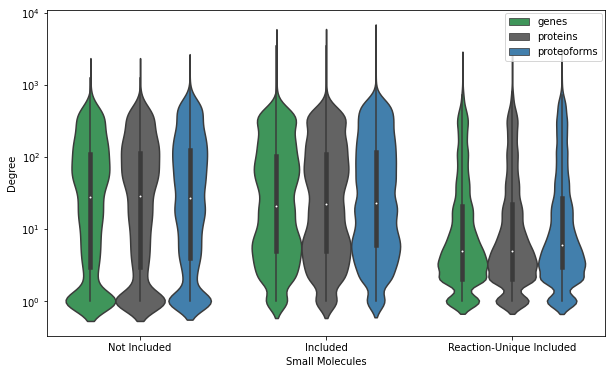

In [50]:
from matplotlib import ticker as mticker

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 6)
fig5 = sns.violinplot(x="Small Molecules", y="Degree", hue="Entity Level", data=df_seq, palette=config.COLORS_BORDER)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$")) # Convert ticks to powers of 10
plt.legend(bbox_to_anchor=(1.0, 1),borderaxespad=0.3) # Put the legend out of the figure
plt.show()
fig5.figure.savefig('figures/figure_5.png')

## Bridges and Articulation points

In [16]:
# br_ap = pd.DataFrame({
#     "Articulation Points": [len(list(nx.articulation_points(graphs[l]))) for l in LEVELS],
#     "Bridges": [len(list(nx.bridges(graphs[l]))) for l in LEVELS]},
#     index=LEVELS)
# br_ap.columns.name = "Entity Type"
#
# br_ap
#

In [17]:
# #plot_low_level_pathways(figures_path="figures/pathways/", graphs_path="reports/pathways/")
#

In [18]:
# # TODO: Write function that plots and highlights the articulation points of an interaction network.
# # TODO: Write function that plots and highlights also the bridges of the network.
#

## Connected components

- Number of connected components
- Size of the largest connected component
- Average size of the connected components
- Size of the smalles connected component
